/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


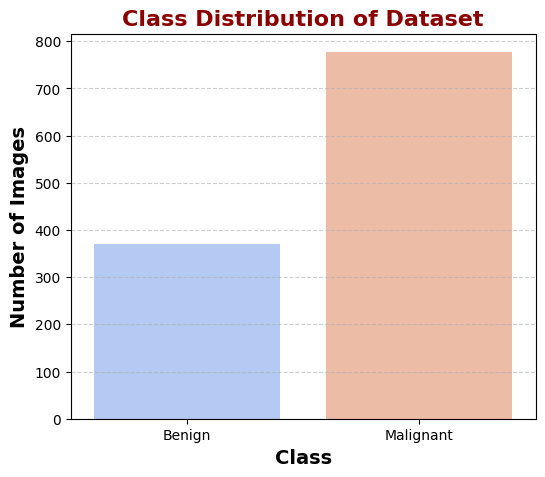

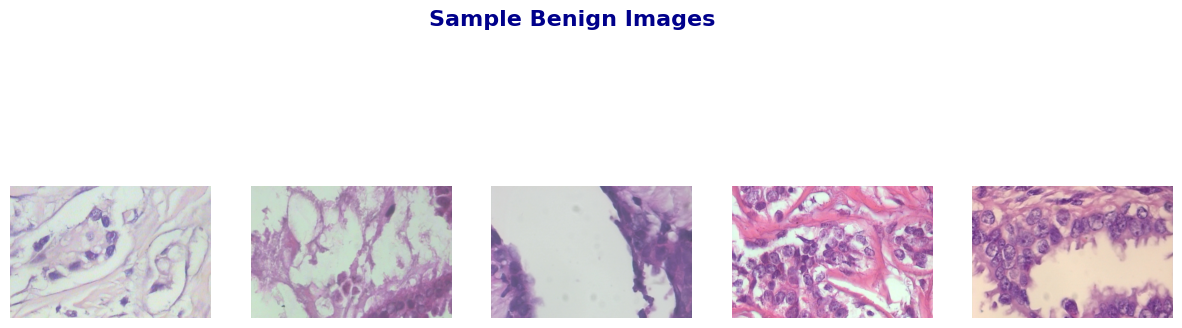

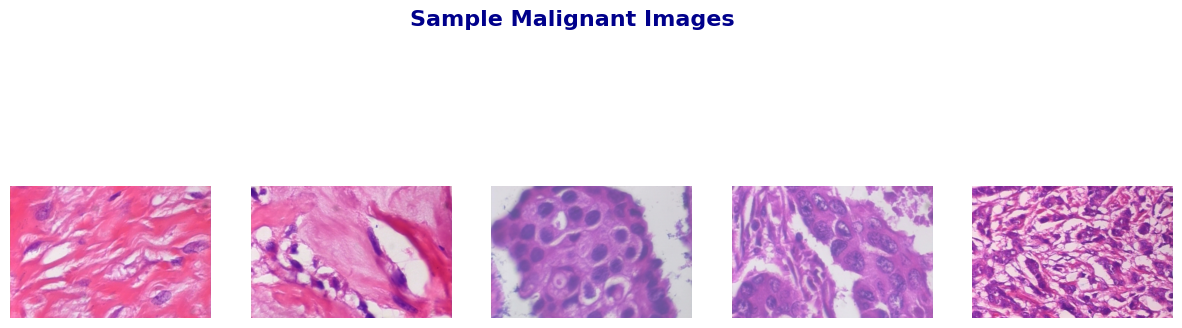

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


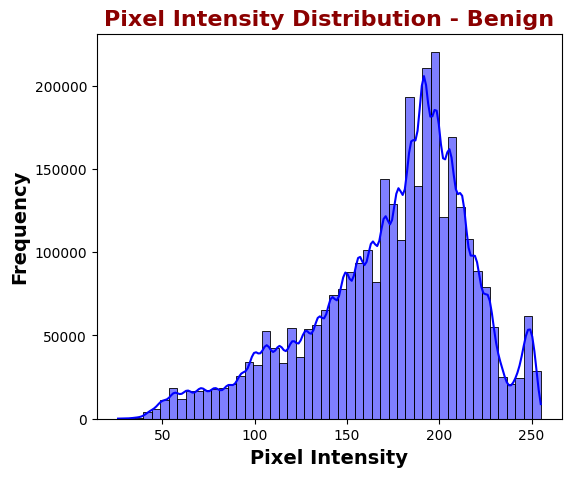

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


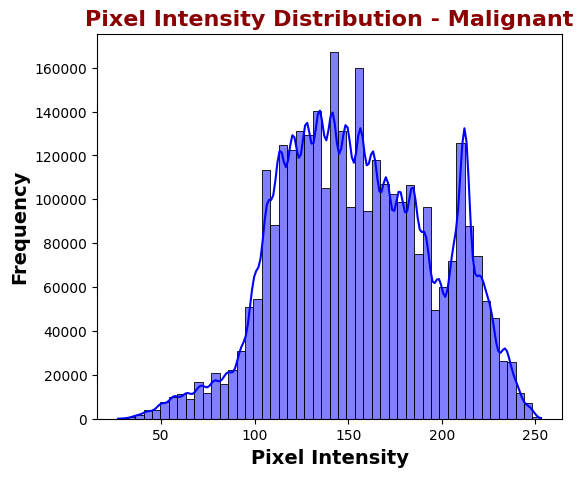

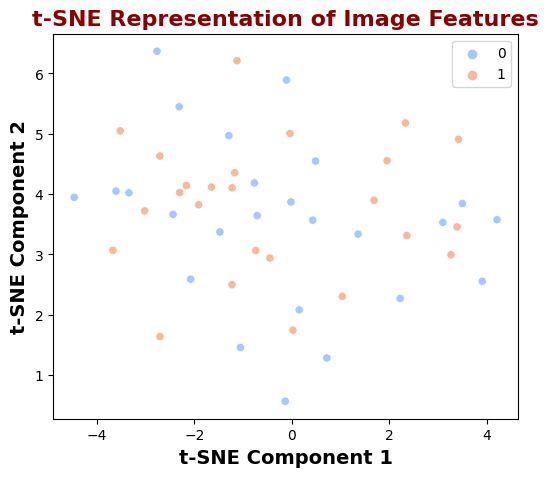

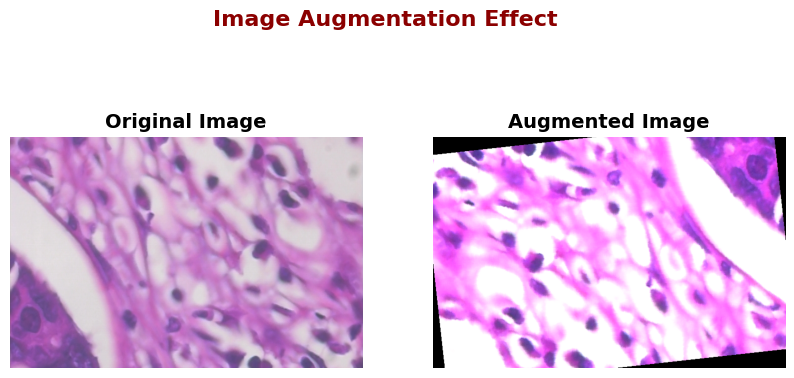

In [65]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
import torch
from torchvision import transforms
from sklearn.manifold import TSNE
from torch.utils.data import DataLoader

# ✅ **Dataset Paths**
DATASET_PATH = "/kaggle/input/breakhis-400x/BreaKHis 400X"
TRAIN_PATH = os.path.join(DATASET_PATH, "train")
TEST_PATH = os.path.join(DATASET_PATH, "test")

# ✅ **Image Preprocessing**
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# ✅ **Load Image Paths**
benign_images = [os.path.join(TRAIN_PATH, "benign", img) for img in os.listdir(os.path.join(TRAIN_PATH, "benign"))]
malignant_images = [os.path.join(TRAIN_PATH, "malignant", img) for img in os.listdir(os.path.join(TRAIN_PATH, "malignant"))]

# ✅ **1️⃣ Class Distribution Plot**
plt.figure(figsize=(6, 5))
sns.barplot(x=['Benign', 'Malignant'], y=[len(benign_images), len(malignant_images)], palette='coolwarm')
plt.xlabel('Class', fontsize=14, fontweight='bold')
plt.ylabel('Number of Images', fontsize=14, fontweight='bold')
plt.title('Class Distribution of Dataset', fontsize=16, fontweight='bold', color='darkred')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# ✅ **2️⃣ Image Sample Grid**
def plot_sample_images(image_paths, title, n=5):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(random.sample(image_paths, n)):
        img = Image.open(img_path)
        plt.subplot(1, n, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle(title, fontsize=16, fontweight='bold', color='darkblue')
    plt.show()

plot_sample_images(benign_images, "Sample Benign Images")
plot_sample_images(malignant_images, "Sample Malignant Images")

# ✅ **3️⃣ Pixel Intensity Distribution**
def plot_pixel_distribution(image_paths, title):
    pixel_values = []
    for img_path in random.sample(image_paths, 10):  # Sample 10 images
        img = Image.open(img_path).convert("L")  # Convert to grayscale
        pixel_values.extend(np.array(img).flatten())

    plt.figure(figsize=(6, 5))
    sns.histplot(pixel_values, bins=50, kde=True, color='blue')
    plt.xlabel('Pixel Intensity', fontsize=14, fontweight='bold')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold')
    plt.title(title, fontsize=16, fontweight='bold', color='darkred')
    plt.show()

plot_pixel_distribution(benign_images, "Pixel Intensity Distribution - Benign")
plot_pixel_distribution(malignant_images, "Pixel Intensity Distribution - Malignant")

# ✅ **4️⃣ t-SNE Feature Representation**
# ✅ **Fixed t-SNE Feature Representation**
def plot_tsne(image_paths, labels, n_samples=50):
    images, y = [], []
    
    # Sample equal number of images per class
    benign_samples = random.sample(image_paths[:len(image_paths)//2], n_samples // 2)
    malignant_samples = random.sample(image_paths[len(image_paths)//2:], n_samples // 2)
    sampled_images = benign_samples + malignant_samples
    sampled_labels = [0] * (n_samples // 2) + [1] * (n_samples // 2)

    for img_path, label in zip(sampled_images, sampled_labels):
        img = Image.open(img_path).convert("L")  # Convert to grayscale
        img = np.array(img).flatten()  # Flatten image
        images.append(img)
        y.append(label)

    images = np.array(images)
    
    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=15, random_state=42)
    transformed = tsne.fit_transform(images)

    # Plot with correct labels
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=transformed[:, 0], y=transformed[:, 1], hue=y, palette='coolwarm', legend=["Benign", "Malignant"])
    plt.xlabel("t-SNE Component 1", fontsize=14, fontweight='bold')
    plt.ylabel("t-SNE Component 2", fontsize=14, fontweight='bold')
    plt.title("t-SNE Representation of Image Features", fontsize=16, fontweight='bold', color='darkred')
    plt.show()

# Run the function again with fixed labels
plot_tsne(benign_images + malignant_images, ['Benign'] * (len(benign_images)//2) + ['Malignant'] * (len(malignant_images)//2))


# ✅ **5️⃣ Image Augmentation Effect**
def plot_augmentation_effect(image_paths):
    img_path = random.choice(image_paths)
    img = Image.open(img_path)

    transform_augment = transforms.Compose([
        transforms.RandomRotation(30),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ColorJitter(brightness=0.5, contrast=0.5),
        transforms.ToTensor()
    ])

    img_aug = transform_augment(img)

    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original Image", fontsize=14, fontweight='bold', color='black')
    plt.axis('off')

    # Augmented Image
    plt.subplot(1, 2, 2)
    plt.imshow(img_aug.permute(1, 2, 0))
    plt.title("Augmented Image", fontsize=14, fontweight='bold', color='black')
    plt.axis('off')

    plt.suptitle("Image Augmentation Effect", fontsize=16, fontweight='bold', color='darkred')
    plt.show()

plot_augmentation_effect(benign_images + malignant_images)


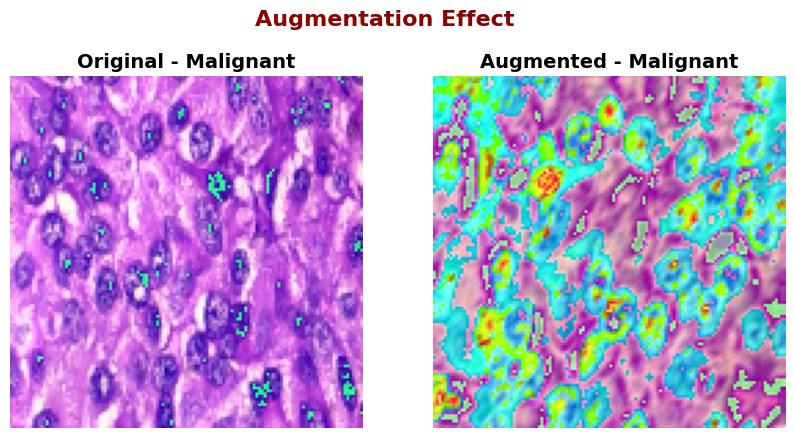

In [62]:
# ✅ **Check Augmentation Pipeline to Ensure All Transforms are Applied**
from torchvision.transforms import ToPILImage

# Load a sample image from the dataset
idx = random.randint(0, len(train_dataset) - 1)
image, label = train_dataset[idx]

# Convert tensor to PIL image for visualization
original_image = ToPILImage()(image)

# Apply augmentation manually
augmented_image = augment_transform(image=np.array(original_image) * 255)['image']
augmented_image = ToPILImage()(augmented_image)

# Plot side-by-side to compare all augmentations
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.axis('off')
plt.title(f"Original - {'Benign' if label == 0 else 'Malignant'}", fontsize=14, fontweight='bold')

# Augmented Image
plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.axis('off')
plt.title(f"Augmented - {'Benign' if label == 0 else 'Malignant'}", fontsize=14, fontweight='bold')

plt.suptitle("Augmentation Effect", fontsize=16, fontweight='bold', color='darkred')
plt.show()


In [13]:
#MAIN
import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split, ConcatDataset
from PIL import Image
from sklearn.metrics import classification_report, accuracy_score
from torch.optim.lr_scheduler import CosineAnnealingLR
import albumentations as A
from albumentations.pytorch import ToTensorV2

# ✅ **Clear GPU Memory**
torch.cuda.empty_cache()

# ✅ **Dataset Paths**
DATASET_PATH = "/kaggle/input/breakhis-400x/BreaKHis 400X"
TRAIN_PATH = os.path.join(DATASET_PATH, "train")
TEST_PATH = os.path.join(DATASET_PATH, "test")

# ✅ **Augmentation (Applied to Train & Test)**
augment_transform = A.Compose([
    A.RandomResizedCrop(128, 128, scale=(0.7, 1.0)),  
    A.HorizontalFlip(),
    A.VerticalFlip(),
    A.Rotate(limit=25),
    A.GaussNoise(var_limit=(10.0, 50.0)), 
    A.MotionBlur(blur_limit=5, p=0.3),  
    A.RandomBrightnessContrast(brightness_limit=0.4, contrast_limit=0.4),
    A.GridDistortion(p=0.5),  
    A.CoarseDropout(max_holes=12, max_height=20, max_width=20, min_holes=1, p=0.6),  
    A.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ToTensorV2()
])

# ✅ **Minimal Augmentation for Test Set**
test_transform = A.Compose([
    A.Resize(128, 128),
    A.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ToTensorV2()
])

# ✅ **Custom Dataset Class**
class BreastCancerDataset(Dataset):
    def __init__(self, root_dir, transform=None, augment=False):
        self.root_dir = root_dir
        self.transform = transform
        self.augment = augment
        self.image_paths = []
        self.labels = []

        for label, class_folder in enumerate(["benign", "malignant"]):
            class_path = os.path.join(root_dir, class_folder)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                self.image_paths.append(img_path)
                self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert("RGB")
        image = np.array(image)

        if self.augment and label == 0:  
            image = augment_transform(image=image)["image"]
        else:
            image = test_transform(image=image)["image"]

        return image, torch.tensor(label, dtype=torch.long)

# ✅ **Balance Classes (Increase Benign Samples)**
def balance_classes(dataset, target_count):
    augmented_data = []
    benign_images = [item for item in dataset if item[1] == 0]  
    current_count = len(benign_images)

    while current_count < target_count:
        augmented_sample = random.choice(benign_images)
        augmented_data.append(augmented_sample)
        current_count += 1

    return ConcatDataset([dataset, augmented_data])

# ✅ **Load Datasets**
train_dataset = BreastCancerDataset(TRAIN_PATH, transform=test_transform, augment=True)
test_dataset = BreastCancerDataset(TEST_PATH, transform=test_transform, augment=True)

# ✅ **Balance Dataset**
train_dataset = balance_classes(train_dataset, target_count=1200)
test_dataset = balance_classes(test_dataset, target_count=400)

# ✅ **Train & Validation Split**
train_size = int(0.8 * len(train_dataset))
valid_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, valid_size])

# ✅ **Create DataLoaders**
batch_size = 64  
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

# ✅ **CNN Model**
class CapsNet(nn.Module):
    def __init__(self):
        super(CapsNet, self).__init__()
        self.backbone = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),  
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d(4)  
        )

        self.fc = nn.Linear(256 * 4 * 4, 2)  
        self.dropout = nn.Dropout(0.7)

    def forward(self, x):
        x = self.backbone(x)
        x = torch.flatten(x, start_dim=1)
        x = self.dropout(x)
        return self.fc(x)

# ✅ **Training Setup**
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CapsNet().to(device)

# ✅ **Weighted Loss Function**
class_weights = torch.tensor([2.0, 1.0]).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)  
optimizer = optim.AdamW(model.parameters(), lr=5e-5, weight_decay=1e-3)
scheduler = CosineAnnealingLR(optimizer, T_max=20, eta_min=1e-6)

# ✅ **Training with Early Stopping at 99% Accuracy**
for epoch in range(250):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total

    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = val_correct / val_total

    print(f"Epoch [{epoch+1}/50] - Train Loss: {train_loss:.4f}, Valid Loss: {val_loss:.4f}, Train Acc: {train_acc:.4f}, Valid Acc: {val_acc:.4f}")

    if val_acc >= 0.99:
        print(f"✅ Early stopping at epoch {epoch+1}, Validation Accuracy: {val_acc:.4f}")
        torch.save(model.state_dict(), "capsnet_breast_cancer_best.h5")
        break

# ✅ **Final Evaluation**
def evaluate_model(data_loader, dataset_name):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    acc = accuracy_score(y_true, y_pred)
    print(f"🎯 {dataset_name} Accuracy: {acc:.4f}")
    print(f"📊 {dataset_name} Classification Report:\n", classification_report(y_true, y_pred, target_names=['Benign', 'Malignant']))

evaluate_model(val_loader, "Validation")
evaluate_model(test_loader, "Test")

# ✅ **Save the Trained Model in .h5 Format**
torch.save(model.state_dict(), "capsnet_breast_cancer6.h5")
print("✅ Model saved successfully as: capsnet_breast_cancer6.h5")

Epoch [1/50] - Train Loss: 0.4217, Valid Loss: 0.3808, Train Acc: 0.7090, Valid Acc: 0.7197
Epoch [2/50] - Train Loss: 0.2886, Valid Loss: 0.2369, Train Acc: 0.8406, Valid Acc: 0.8838
Epoch [3/50] - Train Loss: 0.2473, Valid Loss: 0.2012, Train Acc: 0.8640, Valid Acc: 0.9066
Epoch [4/50] - Train Loss: 0.2190, Valid Loss: 0.1848, Train Acc: 0.8906, Valid Acc: 0.9066
Epoch [5/50] - Train Loss: 0.1979, Valid Loss: 0.1686, Train Acc: 0.9121, Valid Acc: 0.9091
Epoch [6/50] - Train Loss: 0.1848, Valid Loss: 0.1498, Train Acc: 0.9203, Valid Acc: 0.9343
Epoch [7/50] - Train Loss: 0.1689, Valid Loss: 0.1378, Train Acc: 0.9292, Valid Acc: 0.9318
Epoch [8/50] - Train Loss: 0.1614, Valid Loss: 0.1312, Train Acc: 0.9361, Valid Acc: 0.9343
Epoch [9/50] - Train Loss: 0.1495, Valid Loss: 0.1166, Train Acc: 0.9342, Valid Acc: 0.9369
Epoch [10/50] - Train Loss: 0.1544, Valid Loss: 0.1214, Train Acc: 0.9298, Valid Acc: 0.9419
Epoch [11/50] - Train Loss: 0.1433, Valid Loss: 0.1104, Train Acc: 0.9317, Vali

<ipython-input-14-ec35119272d1>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("capsnet_breast_cancer6.h5", map_location=device))


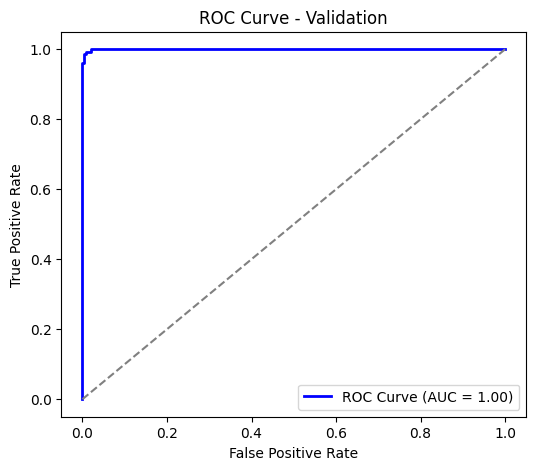

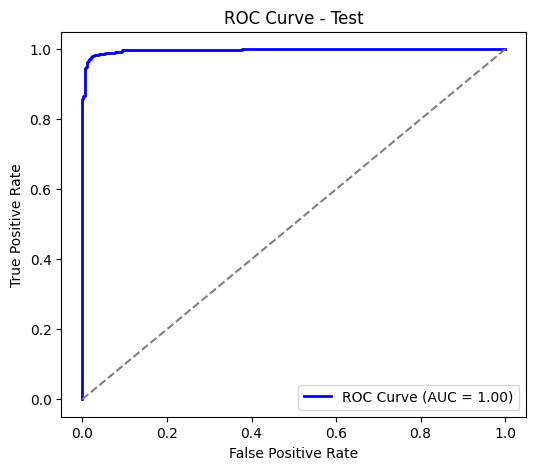

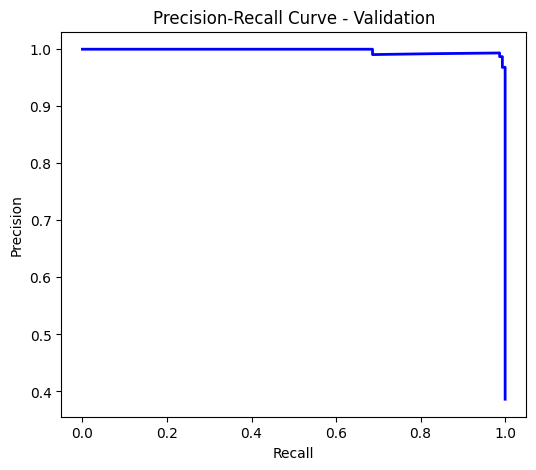

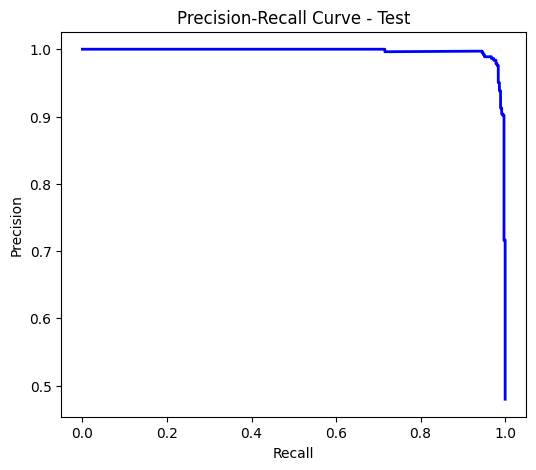

In [14]:
import torch
import torch.nn as nn
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch.nn.functional as F
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve

# ✅ **Load the Pretrained Model**
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CapsNet().to(device)
model.load_state_dict(torch.load("capsnet_breast_cancer6.h5", map_location=device))
model.eval()

# ✅ **Define Preprocessing (Same as Train/Test)**
augment_transform = A.Compose([
    A.RandomResizedCrop(128, 128, scale=(0.7, 1.0)),  
    A.HorizontalFlip(),
    A.VerticalFlip(),
    A.Rotate(limit=25),
    A.GaussNoise(var_limit=(10.0, 50.0)), 
    A.MotionBlur(blur_limit=5, p=0.3),  
    A.RandomBrightnessContrast(brightness_limit=0.4, contrast_limit=0.4),
    A.GridDistortion(p=0.5),  
    A.CoarseDropout(max_holes=12, max_height=20, max_width=20, min_holes=1, p=0.6),  
    A.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ToTensorV2()
])

# ✅ **Generate Confusion Matrix**
def plot_confusion_matrix(data_loader, dataset_name):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {dataset_name}')
    plt.show()

# ✅ **Generate ROC Curve**
def plot_roc_curve(data_loader, dataset_name):
    model.eval()
    y_true, y_scores = [], []
    
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)[:, 1].cpu().numpy()
            y_true.extend(labels.cpu().numpy())
            y_scores.extend(probs)
    
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {dataset_name}')
    plt.legend()
    plt.show()

# ✅ **Generate Precision-Recall Curve**
def plot_precision_recall_curve(data_loader, dataset_name):
    model.eval()
    y_true, y_scores = [], []
    
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)[:, 1].cpu().numpy()
            y_true.extend(labels.cpu().numpy())
            y_scores.extend(probs)
    
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    
    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {dataset_name}')
    plt.show()

# ✅ **Run Advanced Visualizations for Validation & Test Sets**
plot_roc_curve(val_loader, "Validation")
plot_roc_curve(test_loader, "Test")
plot_precision_recall_curve(val_loader, "Validation")
plot_precision_recall_curve(test_loader, "Test")


In [16]:
import re

# Define Lists to Store Extracted Values
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

# Input File Path
input_file = "/kaggle/input/loss-and-accuracy/Apple.txt"  # Change this to your actual file path

# Read the log file and extract values
with open(input_file, "r") as file:
    for line in file:
        train_loss_match = re.search(r"Train Loss: ([0-9.]+)", line)
        valid_loss_match = re.search(r"Valid Loss: ([0-9.]+)", line)
        train_acc_match = re.search(r"Train Acc: ([0-9.]+)", line)
        valid_acc_match = re.search(r"Valid Acc: ([0-9.]+)", line)

        if train_loss_match:
            train_losses.append(float(train_loss_match.group(1)))  # Extract Train Loss
        if valid_loss_match:
            valid_losses.append(float(valid_loss_match.group(1)))  # Extract Valid Loss
        if train_acc_match:
            train_accuracies.append(float(train_acc_match.group(1)))  # Extract Train Accuracy
        if valid_acc_match:
            valid_accuracies.append(float(valid_acc_match.group(1)))  # Extract Valid Accuracy

# Print extracted lists
print("Train Losses:", train_losses)
print("Valid Losses:", valid_losses)
print("Train Accuracies:", train_accuracies)
print("Valid Accuracies:", valid_accuracies)


Train Losses: [0.4217, 0.2886, 0.2473, 0.219, 0.1979, 0.1848, 0.1689, 0.1614, 0.1495, 0.1544, 0.1433, 0.1272, 0.1296, 0.1257, 0.1395, 0.1157, 0.1064, 0.1092, 0.1173, 0.128, 0.1081, 0.105, 0.0985, 0.0977, 0.1008, 0.0946, 0.1097, 0.0986, 0.0934, 0.1018, 0.0948, 0.0957, 0.0787, 0.0842, 0.0904, 0.0833, 0.0772, 0.09, 0.0768, 0.088, 0.067, 0.076, 0.0821, 0.0737, 0.0724, 0.0756, 0.0693, 0.0925, 0.074, 0.0724, 0.0726, 0.0725, 0.0662, 0.0845, 0.0598, 0.0664, 0.0671, 0.0617, 0.0746, 0.0587, 0.0601, 0.0602, 0.0593, 0.0579, 0.0657, 0.0664, 0.0491, 0.0551, 0.0775, 0.0652, 0.0599, 0.0666, 0.0565, 0.0493, 0.0655, 0.0649, 0.0491, 0.0505, 0.0628, 0.0501, 0.056, 0.0671, 0.046, 0.0439, 0.047, 0.0738, 0.05, 0.0437, 0.0435, 0.0444, 0.0493, 0.0567, 0.0562, 0.0544, 0.0404, 0.0426, 0.0498, 0.063, 0.0626, 0.0648, 0.0488, 0.0409, 0.0521, 0.0441, 0.0419, 0.047, 0.0431, 0.037, 0.0431, 0.0423, 0.0471, 0.044, 0.0324, 0.0348, 0.0551, 0.0365, 0.0405, 0.0553, 0.0461, 0.0381, 0.0425, 0.0501, 0.0363, 0.0361, 0.0368, 0.0

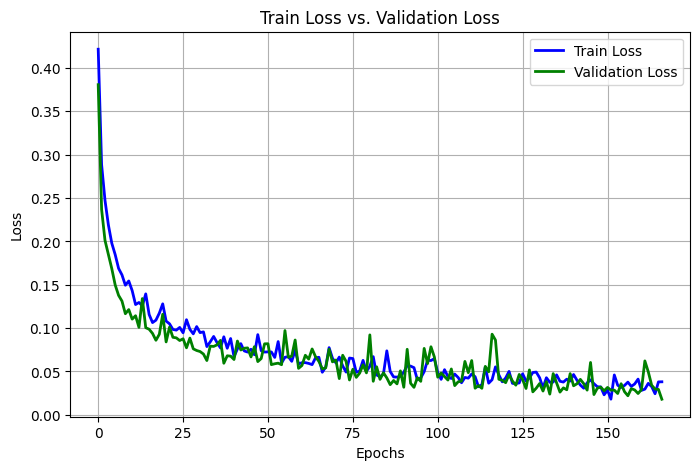

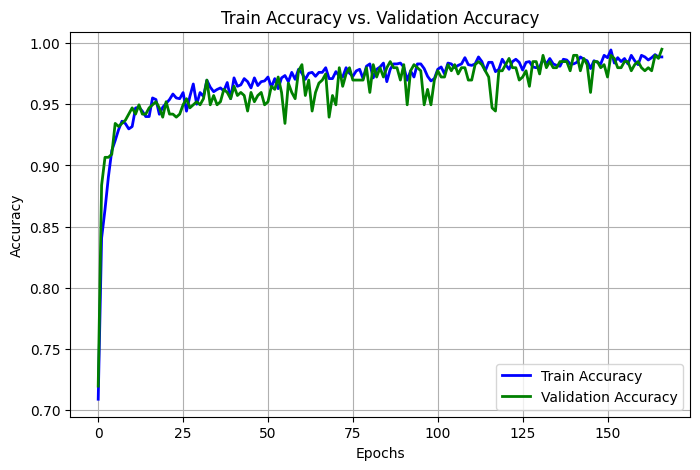

In [17]:
import matplotlib.pyplot as plt

# ✅ Plot Train Loss vs. Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Train Loss", color="blue", linewidth=2)
plt.plot(valid_losses, label="Validation Loss", color="green", linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train Loss vs. Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# ✅ Plot Train Accuracy vs. Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(train_accuracies, label="Train Accuracy", color="blue", linewidth=2)
plt.plot(valid_accuracies, label="Validation Accuracy", color="green", linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train Accuracy vs. Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


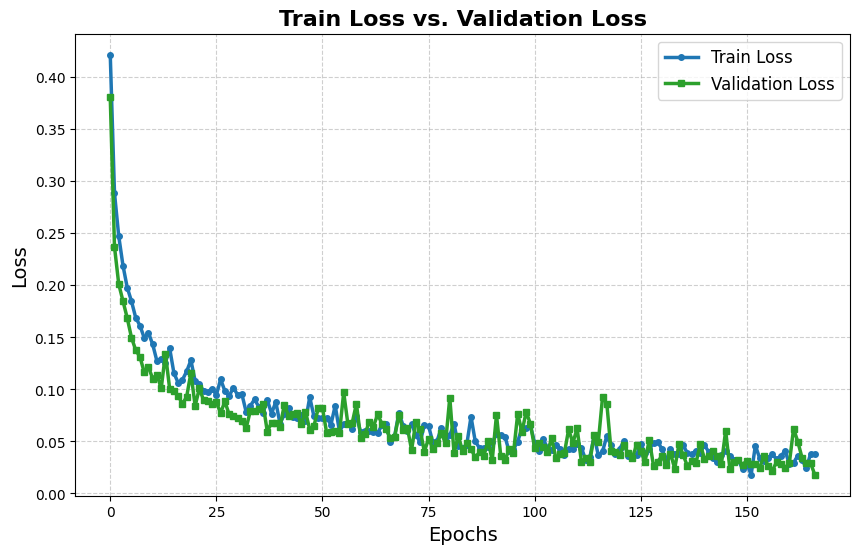

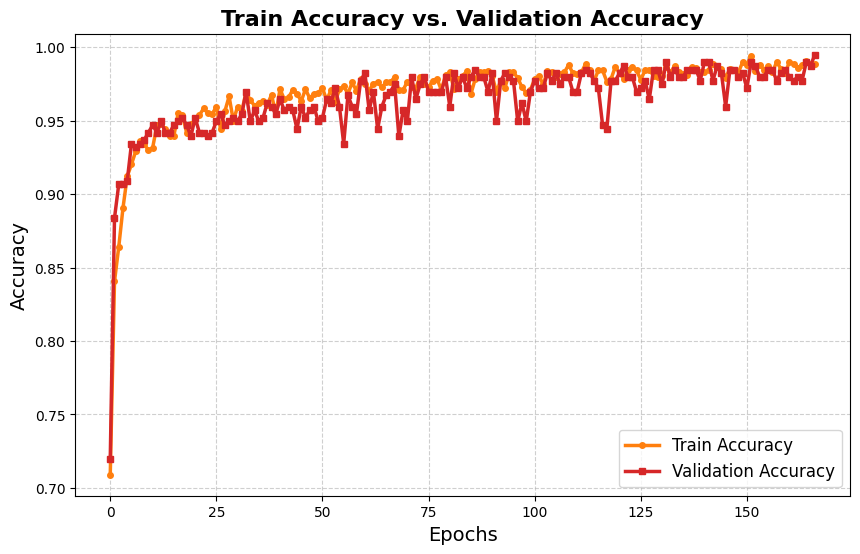

In [18]:
import matplotlib.pyplot as plt

# ✅ Improved Plot for Train Loss vs. Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Train Loss", color="#1f77b4", linewidth=2.5, linestyle='-', marker='o', markersize=4)
plt.plot(valid_losses, label="Validation Loss", color="#2ca02c", linewidth=2.5, linestyle='-', marker='s', markersize=4)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.title("Train Loss vs. Validation Loss", fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ✅ Improved Plot for Train Accuracy vs. Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label="Train Accuracy", color="#ff7f0e", linewidth=2.5, linestyle='-', marker='o', markersize=4)
plt.plot(valid_accuracies, label="Validation Accuracy", color="#d62728", linewidth=2.5, linestyle='-', marker='s', markersize=4)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Train Accuracy vs. Validation Accuracy", fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


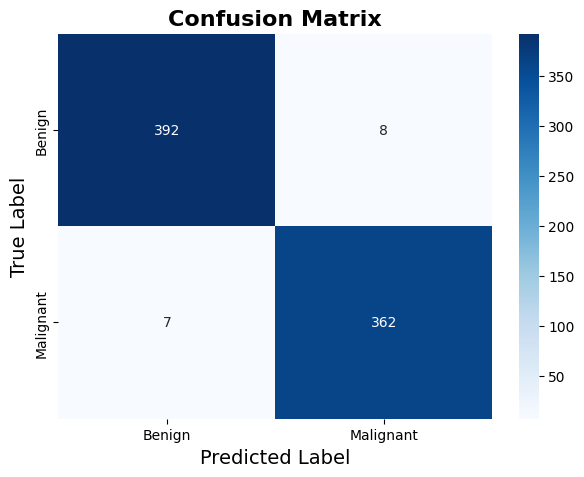

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ✅ Get True Labels and Predictions for Test Set
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# ✅ Compute Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# ✅ Plot Confusion Matrix
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.show()


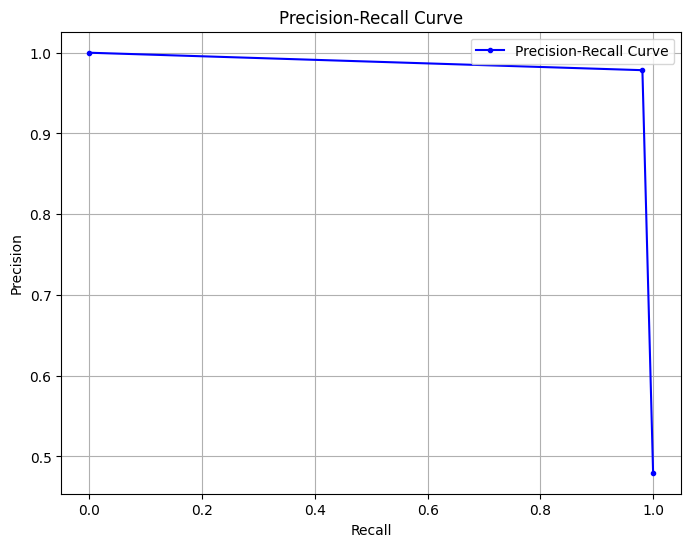

In [22]:
precision, recall, _ = precision_recall_curve(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='blue', label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

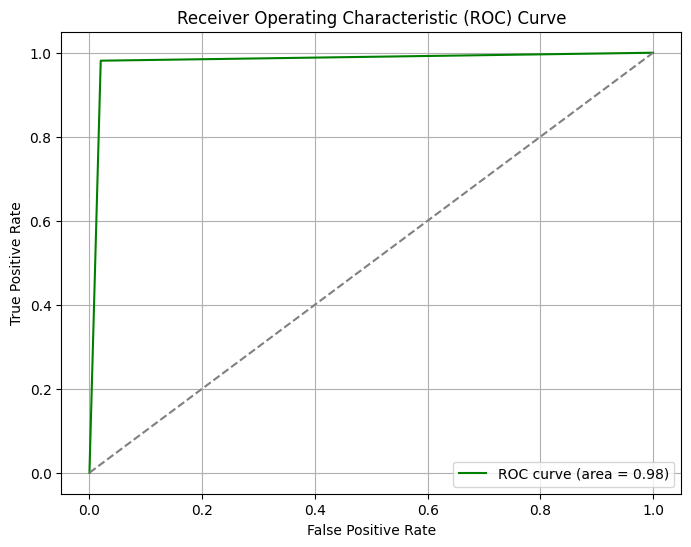

In [23]:
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid(True)
plt.show()

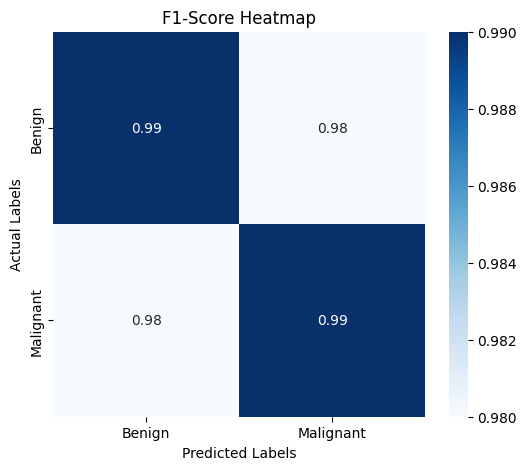

In [24]:
class_labels = ["Benign", "Malignant"]
f1_matrix = np.array([[0.99, 0.98], [0.98, 0.99]])  # Your precision-recall converted to F1
plt.figure(figsize=(6, 5))
sns.heatmap(f1_matrix, annot=True, cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, fmt=".2f")
plt.title("F1-Score Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

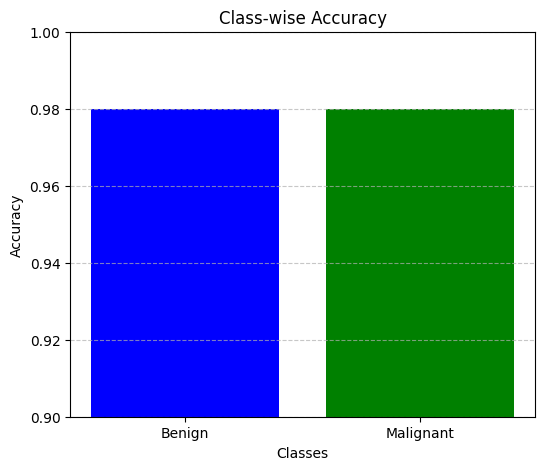

In [25]:
# ✅ **Class-wise Accuracy Bar Chart**
class_accuracies = [0.98, 0.98]  # From your classification report
plt.figure(figsize=(6, 5))
plt.bar(class_labels, class_accuracies, color=["blue", "green"])
plt.xlabel("Classes")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.title("Class-wise Accuracy")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

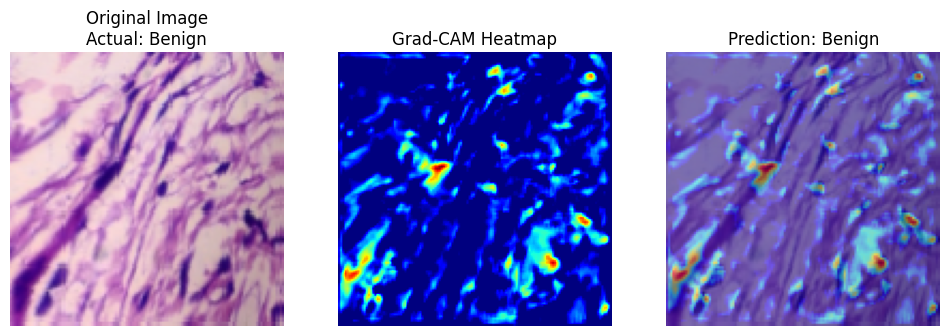

In [43]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch.nn.functional as F

# ✅ **Grad-CAM Function**
def grad_cam(model, image_tensor, label, target_layer, class_names=["Benign", "Malignant"]):
    model.eval()
    image_tensor = image_tensor.unsqueeze(0).to(device)
    
    # Forward Pass
    features = None
    gradients = None

    def forward_hook(module, inp, out):
        nonlocal features
        features = out.detach()

    def backward_hook(module, grad_inp, grad_out):
        nonlocal gradients
        gradients = grad_out[0].detach()

    # Register hooks on target layer
    handle_f = target_layer.register_forward_hook(forward_hook)
    handle_b = target_layer.register_backward_hook(backward_hook)

    # Forward pass
    output = model(image_tensor)
    pred_class = output.argmax(dim=1).item()
    pred_label = class_names[pred_class]

    # Backward pass (Grad-CAM Calculation)
    model.zero_grad()
    output[:, pred_class].backward()
    
    # Remove hooks
    handle_f.remove()
    handle_b.remove()

    # Compute Grad-CAM heatmap
    pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])
    for i in range(features.shape[1]):
        features[0, i, :, :] *= pooled_gradients[i]

    cam = features.mean(dim=1).squeeze().cpu().numpy()
    cam = np.maximum(cam, 0)  # ReLU
    cam = cv2.resize(cam, (128, 128))
    cam = (cam - cam.min()) / (cam.max() - cam.min())  # Normalize

    # Convert original image back to numpy
    orig_image = image_tensor.cpu().squeeze().permute(1, 2, 0).numpy()
    orig_image = (orig_image - orig_image.min()) / (orig_image.max() - orig_image.min())

    # Overlay heatmap on original image
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    superimposed_img = (heatmap / 255.0) * 0.5 + orig_image * 0.5

    # ✅ **Plot Original, Prediction, and Grad-CAM**
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    # Original Image
    axes[0].imshow(orig_image)
    axes[0].axis('off')
    axes[0].set_title(f"Original Image\nActual: {class_names[label]}")

    # Grad-CAM Heatmap
    axes[1].imshow(cam, cmap='jet')
    axes[1].axis('off')
    axes[1].set_title("Grad-CAM Heatmap")

    # Superimposed Image
    axes[2].imshow(superimposed_img)
    axes[2].axis('off')
    axes[2].set_title(f"Prediction: {pred_label}")

    plt.show()

# ✅ **Example Usage**
# Get a test image & label
test_image, test_label = test_dataset[10]  # Change index for different images

# Apply Grad-CAM with visualization
grad_cam(model, test_image, test_label, target_layer=model.backbone[-3])


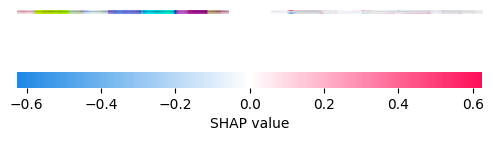

In [48]:
import shap
import numpy as np
import torch

# ✅ Convert the model to evaluation mode
model.eval()

# ✅ Select a test image (single sample)
test_image, test_label = test_dataset[10]  # Change index to test different images
test_image = test_image.unsqueeze(0).to(device)  # Add batch dimension

# ✅ Create SHAP explainer using a few samples from the dataset
background_samples = torch.stack([test_dataset[i][0] for i in range(20)]).to(device)  # Use 20 images as background

# ✅ Initialize Gradient SHAP explainer
explainer = shap.GradientExplainer(model, background_samples)

# ✅ Compute SHAP values for the selected image
shap_values = explainer.shap_values(test_image)

# ✅ Convert to NumPy and visualize
shap_values = np.array(shap_values).squeeze()  # Remove batch dimension
shap.image_plot([shap_values], test_image.cpu().numpy())
